# Task 1: Introduction, Background, Motivation & Challenges

## Introduction
In recent years, predicting age from facial images has become an intriguing and useful challenge with applications in social media, security, and healthcare. For this project, we’ve selected the "UTKFace" dataset from Kaggle, which contains over 20,000 labeled facial images representing a diverse range of ages, genders, and ethnicities. This rich dataset provides an ideal foundation for developing a regression model aimed at estimating age as a continuous variable.

## Background
The UTKFace dataset offers labeled images with age, gender, and ethnicity, making it ideal for studying how facial features correspond with age. By training a regression model to predict age, we can examine how age-related traits generalize across diverse groups. Accurate age estimation has practical applications in identity verification, content personalization, and healthcare, where age-based data can reveal markers for certain conditions. Through this project, we aim to translate facial images into reliable age estimates, contributing to ongoing research in visual age prediction.

## Motivation
Predicting age from facial images poses a fascinating technical challenge with real-world significance. Initially, we considered using a dog image dataset to predict dog age, but we realized that breed-specific variations would complicate the analysis. Human facial features, on the other hand, show more consistent indicators of aging, such as skin texture, wrinkles, and face shape, making human age prediction a more feasible and relevant starting point.

## Potential Impact and Challenges
Effective age prediction from facial images has the potential to improve personalized services, strengthen identity verification, and aid healthcare providers by identifying age-related changes that may indicate health risks. A robust model could make age prediction accessible across industries, fueling innovations in user engagement and security.

However, age estimation from facial images brings several challenges. Aging patterns vary widely due to genetics, lifestyle, and environmental factors, while gender and ethnicity can influence unique aging traits, which may introduce bias in the model. Additionally, factors like lighting, pose, and facial expressions affect image quality, complicating accurate predictions. By using preprocessing techniques and careful model selection, we aim to build a model that performs well and is adaptable to these variations. We opted for traditional machine learning models over deep learning models, like CNNs, to create a lightweight, efficient model that maintains accuracy with fewer computational resources.

## Project Goals
With this project, we aim to achieve accurate and efficient age prediction using accessible machine learning techniques. By addressing the challenges involved and utilizing the UTKFace dataset effectively, we hope to contribute valuable insights into visual age prediction while demonstrating that traditional models, when optimized, can achieve strong performance in this field.


# Task 2: Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an essential starting point in any data project. The goal of this analysis is to understand our dataset more thoroughly, identify patterns, spot any anomalies, and assess data characteristics that might impact model performance. In this task, we are working with the UTKFace dataset, a diverse collection of facial images labeled with age, gender, and ethnicity, to develop a model that predicts age from facial features. By examining the data from different perspectives, we can make informed decisions on preprocessing steps, feature selection, and model choice. 

## Data Loading and Summary

We begin by loading a batch of images from the UTKFace dataset and extracting details like age, gender, ethnicity, and image dimensions. A quick summary of key information, including the age range, unique values for gender and ethnicity, and image dimensions, provides an initial overview of the dataset’s structure. This initial assessment helps us identify any irregularities and better understand the data we’re working with.

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import random

def load_batch_metadata(image_directory, batch_size=None):
    ages = []
    genders = []
    ethnicities = []
    widths = []
    heights = []
    paths = []

    img_files = [img for img in os.listdir(image_directory) if img.endswith('.jpg')]

    if batch_size is None:
        img_files_batch = img_files
    else:
        img_files_batch = img_files[:batch_size]

    for img_name in img_files_batch:
        try:
            parts = img_name.split('_')
            if len(parts) == 4:
                age, gender, ethnicity, _ = parts

                path = os.path.join(image_directory, img_name)
                img = Image.open(path)

                width, height = img.size

                widths.append(width)
                heights.append(height)
                ages.append(int(age))
                genders.append(int(gender))
                ethnicities.append(int(ethnicity))
                paths.append(path)

        except Exception as e:
            print(f"Error processing {img_name}: {e}")

    df = pd.DataFrame({
        'Age': ages,
        'Gender': genders,
        'Ethnicity': ethnicities,
        'Width': widths,
        'Height': heights,
        'Image_Path': paths
    })

    print(f"\nLoaded {len(df)} images.")
    print(f"Ages range: {np.min(ages)} - {np.max(ages)}")
    print(f"Unique genders: {np.unique(genders)}")
    print(f"Unique ethnicities: {np.unique(ethnicities)}")
    print(f"Unique widths: {np.unique(widths)}")
    print(f"Unique heights: {np.unique(heights)}")

    return df

def get_image(image_path):
    try:
        img = Image.open(image_path)
        return img  
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

image_directory = './dataset/UTKFace/'
df = load_batch_metadata(image_directory)
print(f"DataFrame:\n{df.head(2)}")


The UTKFace dataset contains **23,705 images** after excluding 3 that did not adhere to the naming convention `age_gender_ethnicity_timestamp.jpg`. Each image is labeled with metadata for age, gender, and ethnicity, providing valuable information for age prediction analysis. The images, formatted in RGB with three color channels (Red, Green, Blue), are consistently sized at **200x200 pixels**. The age data spans from **0 to 116 years**, with each age represented as an integer. Gender is labeled as `0` for Male and `1` for Female, and ethnicity is categorized into five groups: `0` for White, `1` for Black, `2` for Asian, `3` for Indian, and `4` for Others (such as Latino or Middle Eastern). This structured and diverse dataset is well-suited for developing robust age prediction models.

## Age Statistical Measures

To gain insight into the age distribution within our dataset, we calculate essential statistical measures like mean, median, mode, variance, and standard deviation. Percentiles are also included to examine how ages are spread out and to identify any age ranges that appear more frequently. These metrics give us a clearer understanding of the central tendencies and variations in the data, helping us to see if certain age groups are more prominent and if the dataset leans toward younger or older age ranges.


In [ ]:
import numpy as np
from scipy import stats

ages = df['Age']

mean_age = np.mean(ages)
median_age = np.median(ages)
mode_result = stats.mode(ages)
variance_age = np.var(ages)
std_dev_age = np.std(ages)
percentiles = np.percentile(ages, [25, 50, 75])

mode_age = mode_result.mode

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age}")

print(f"\nVariance of Age: {variance_age:.2f}")
print(f"Standard Deviation of Age: {std_dev_age:.2f}")

print(f"\n25th Percentile (Q1): {percentiles[0]}")
print(f"50th Percentile (Q2): {percentiles[1]}")
print(f"75th Percentile (Q3): {percentiles[2]}")


We obtained the following measures: 
- **Mean Age**: **33.3 years**. Represents the average age in the dataset, indicating a central tendency around the early 30s.

- **Median Age**: **29 years**. Half of the dataset's individuals are younger than 29, while the other half are older. This marks the center of the dataset’s age distribution.

- **Mode Age**: **26 years**. The most frequently occurring age in the dataset, suggesting a slight concentration of individuals around this age.

- **Age Variance**: **395.42**. The relatively high variance shows a broad age range, reflecting diversity in the dataset’s age groups.

- **Standard Deviation of Age**: **19.89**.  Indicates an average deviation of about 20 years from the mean age of 33.3, confirming a wide spread of ages.

- **Percentiles**:
  - **25th Percentile (Q1)**: **23.0 years**  
    - Indicates that 25% of the individuals are younger than 23, showing a significant representation of younger individuals.
  
  - **50th Percentile (Q2)** (Median): **29.0 years**  
    - The median age, with half the dataset being younger and half older, aligns with the central distribution.
  
  - **75th Percentile (Q3)**: **45.0 years**  
    - Seventy-five percent of individuals are younger than 45, with the remaining 25% older, indicating a slight skew towards younger ages.

These statistics highlight the diversity in age groups within the dataset, showing a balanced representation across various ages with a slight concentration in younger demographics. 


## Image Inspection

In this step, we view random images to make sure they are loaded correctly and to get a sense of how the images look across different age groups. Displaying random images from the dataset with age labels helps visually confirm the dataset's diversity and gives insight into how age is represented in various individuals.

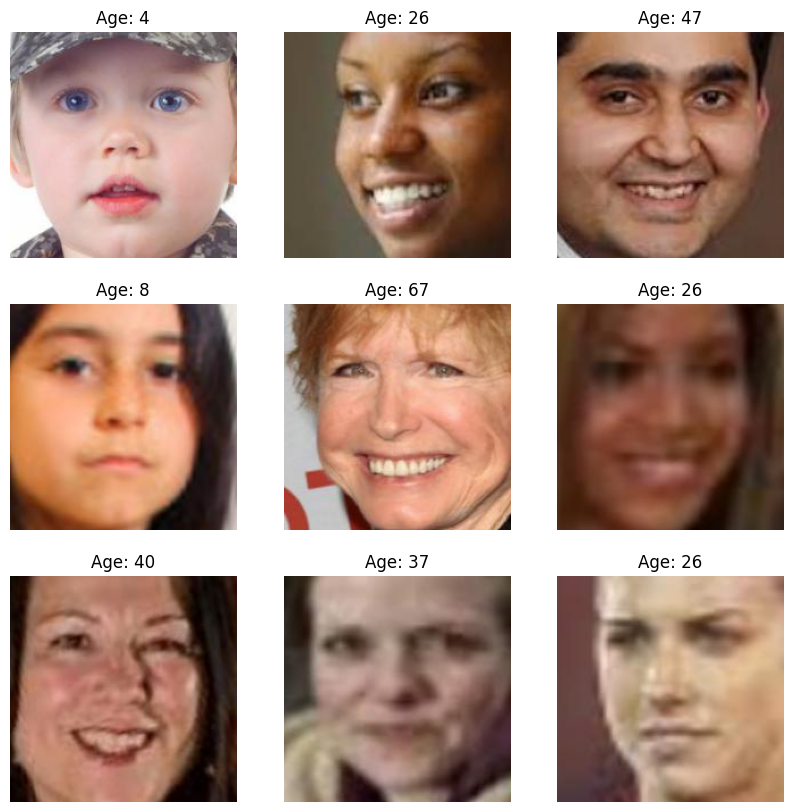

In [3]:
import matplotlib.pyplot as plt
import random
from PIL import Image

plt.figure(figsize=(10, 10))

for i in range(9):
    idx = random.randint(0, len(df) - 1)  
    img_path = df['Image_Path'].iloc[idx] 
    
    image = get_image(img_path)
    
    plt.subplot(3, 3, i+1)
    if image is not None:  
        plt.imshow(image)
        plt.title(f'Age: {df["Age"].iloc[idx]}')
        plt.axis('off')

plt.show()



The image inspection shows a broad range of faces, representing various ages, ethnicities, and expressions. In our sample, we see individuals spanning a wide age range, from young children (around age 4) to older adults (up to age 67). This diversity is crucial for training an age-prediction model, as it allows the model to encounter a full range of age-related facial features.

We also notice different lighting conditions, skin tones, and face angles, which add complexity to the model's task. The variety in appearance, age, and ethnicity could help the model generalize across demographic groups, though it may also introduce potential sources of bias. The images are consistently cropped to focus on the face, highlighting features like wrinkles and skin smoothness, which are key to accurate age predictions.


## Age Distribution

To understand how ages are spread throughout the dataset, we use a histogram and KDE plot. This visual analysis helps us see if certain age groups are over- or underrepresented, which can impact model performance and introduce potential bias. Recognizing these distribution patterns is essential for assessing how well the model might generalize across different age ranges.

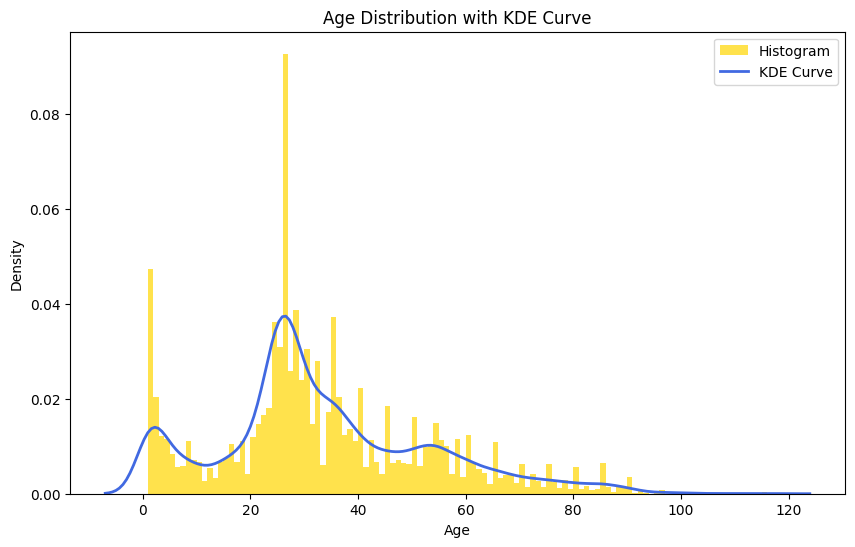

In [2]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=range(int(df['Age'].min()), int(df['Age'].max()) + 1), alpha=0.7, color='gold', density=True, label='Histogram')
sns.kdeplot(df['Age'], color='royalblue', linewidth=2, label='KDE Curve')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution with KDE Curve')
plt.legend()
plt.show()

The age distribution in the dataset reveals a strong concentration of younger individuals, particularly around ages 0 and 25, indicating a large number of children and young adults. The distribution is right-skewed, with fewer samples as age increases and only a limited number of images representing people over 60. This imbalance suggests that the dataset is weighted toward younger age groups, which could affect the model’s accuracy for predicting older ages. The KDE curve highlights this skew even more, with most data points clustering below age 50.

## Gender and Ethnicity Distribution

Examining the distribution of genders and ethnicities helps us understand the demographic makeup of the dataset. This analysis includes a bar chart for gender distribution and a pie chart for ethnicity distribution, giving a clear picture of whether the dataset is balanced or if certain groups are underrepresented.


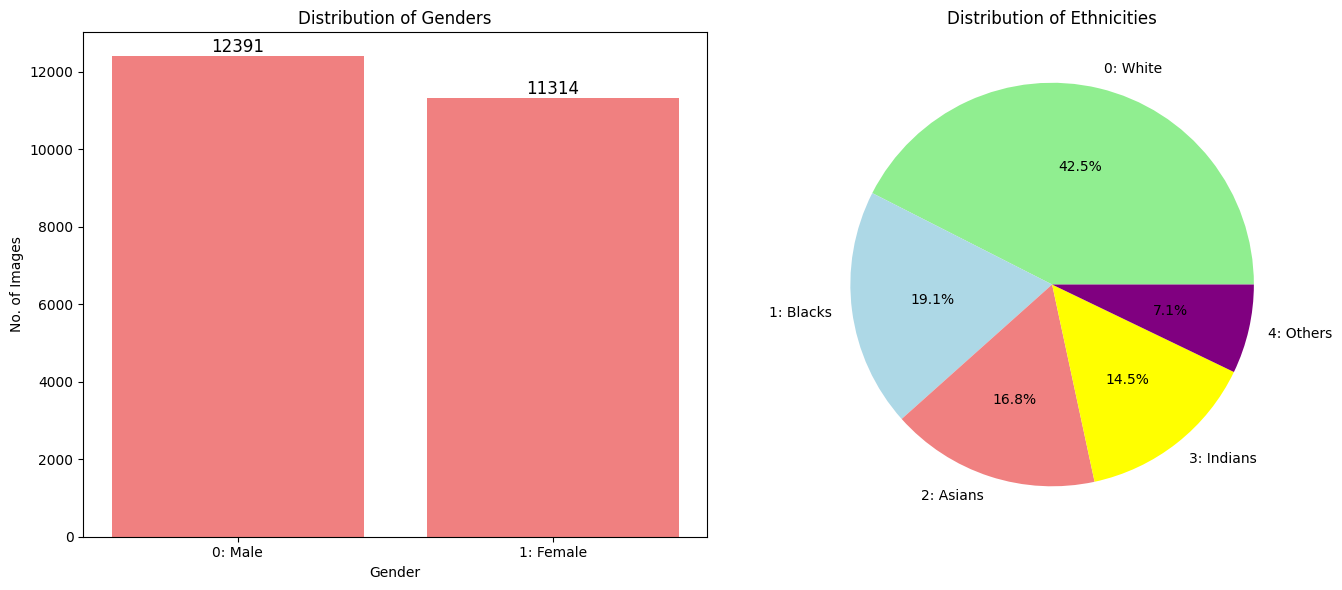

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

gender_counts = df['Gender'].value_counts()
ax[0].bar(['0: Male', '1: Female'], gender_counts, color='lightcoral')
for i, count in enumerate(gender_counts):
    ax[0].text(i, count + 100, str(count), ha='center', fontsize=12)
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('No. of Images')
ax[0].set_title('Distribution of Genders')

ethnicity_counts = df['Ethnicity'].value_counts()
ax[1].pie(ethnicity_counts, labels=['0: White', '1: Blacks', '2: Asians', '3: Indians', '4: Others'], 
          autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'yellow', 'purple'])
ax[1].set_title('Distribution of Ethnicities')

plt.tight_layout()
plt.show()


The gender distribution in the dataset is fairly balanced, with **12,391 male images** and **11,314 female images**, giving a slight majority to males. This close balance helps reduce the risk of gender-related bias in the model.

Regarding ethnicity, the dataset is quite diverse, with **42.5% of images labeled as White**, followed by **19.1% Black**, **16.8% Asian**, **14.5% Indian**, and **7.1% in the 'Others' category** (including Latino, Middle Eastern, and other ethnicities). While the 'White' category is most represented, this variety allows the model to learn age-related features across different ethnic groups, enhancing its ability to generalize. However, the smaller representation in the 'Others' category could impact model accuracy for those groups.

## Age Distribution by Gender

To delve deeper into any age-gender interactions, we examine age distributions within each gender category. Using KDE plots for both males and females, this analysis highlights whether age trends differ between genders, which could impact the model’s performance and accuracy across gender groups.

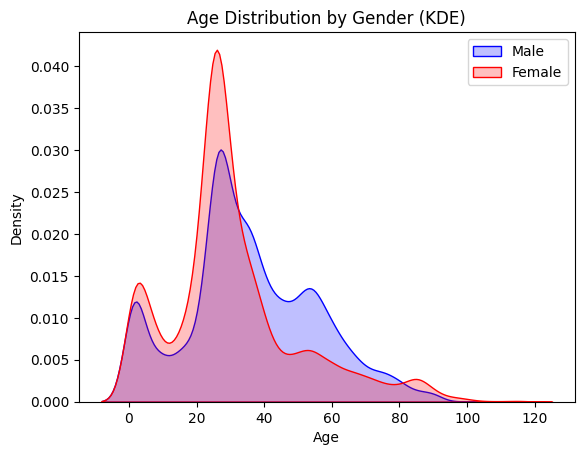

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(df[df['Gender'] == 0]['Age'], label='Male', fill=True, color='blue')
sns.kdeplot(df[df['Gender'] == 1]['Age'], label='Female', fill=True, color='red')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Gender (KDE)')
plt.legend()
plt.show()

The age distribution by gender shows some interesting patterns. Both male and female groups have a high density of individuals in the younger age ranges, especially around ages **20-30**. However, there’s a peak around age **20** that is slightly more pronounced for females, suggesting a higher concentration of younger females in the dataset.

As age increases, the density declines for both genders, but males display a broader spread in the older age ranges compared to females. This trend is noticeable in the **40-70** age range, where the male distribution remains somewhat higher, indicating a relatively larger representation of older males.

Beyond age **70**, both distributions drop off sharply, with very few individuals over age **80**. This suggests that while younger to middle-aged individuals are well-represented, there may be fewer examples of elderly individuals, especially elderly females. This uneven age and gender distribution might affect the model's accuracy, potentially making it more reliable for predicting younger ages and for male individuals.

## EDA Insights

Our exploratory data analysis (EDA) of the UTKFace dataset provided key insights into its demographic and structural features, helping us plan an effective approach for age prediction. The dataset includes 23,705 labeled images with age, gender, and ethnicity data. We found a high concentration of younger individuals, especially around ages 0 and 25, with fewer older adults represented. This skew could impact the model's ability to recognize age features in older faces, potentially affecting accuracy in those predictions. Gender distribution is nearly even, with 12,391 male and 11,314 female images, which should help reduce gender-related bias. However, the ethnicity distribution is less balanced, with a predominant representation of White individuals (42.5%) and smaller groups, particularly in the 'Others' category, which includes Latino and Middle Eastern faces (7.1%).

Our visual inspection highlighted various lighting conditions, skin tones, and facial angles, adding complexity to the modeling process. The consistent 200x200 pixel size in RGB format is helpful for standardizing processing, though variations in lighting and color require careful handling. To address these issues, we plan to use preprocessing steps like grayscale conversion and contrast adjustment to reduce the impact of color and lighting differences, allowing the model to focus more on age-specific features. Additionally, we’ll consider grouping ages into broader categories to create a more balanced distribution, along with demographic balancing techniques, to improve the model’s ability to generalize across diverse age, gender, and ethnicity groups.


# Task 3: Problem Definition

Predicting age from facial images is an engaging challenge with useful applications in areas like social media, security, and healthcare. For this project, we’re working with the UTKFace dataset, which includes 23,705 labeled images with information on age, gender, and ethnicity. This diverse dataset captures age-related visual cues across various demographics, making it ideal for our exploration into age prediction.

Our goal is to develop a practical solution that balances accuracy with computational efficiency, given the constraints of working on a personal computer and handling high-dimensional data. To achieve this, we’re testing traditional machine learning models, which are less resource-intensive than deep learning models like Convolutional Neural Networks (CNNs). Since each image is 200x200 pixels, we’ve applied dimensionality reduction techniques like Principal Component Analysis (PCA) to make the data more manageable while preserving important patterns.

Our initial analysis identified several challenges: the dataset’s age distribution is right-skewed, with more younger individuals under 50 and fewer older ones. There’s also an ethnic imbalance, with a large portion of White individuals (42.5%) and smaller percentages for other groups, like Black (19.1%), Asian (16.8%), Indian (14.5%), and Others (7.1%). These imbalances may skew the model’s predictions, reducing its effectiveness for underrepresented demographics.

To address these issues, we plan to group ages into broader bins for more balanced age representation and ensure more even distributions across genders and age groups. Additionally, we’ll use preprocessing steps like grayscale conversion and contrast adjustments to help the model focus on structural facial features, reducing biases from lighting, skin tones, and ethnic backgrounds. These adjustments should improve the model’s generalizability and ability to capture age-related features accurately across demographic groups.

By focusing on an efficient, accessible solution, this project demonstrates the potential of traditional machine learning models for age prediction, especially in resource-limited settings like mobile or edge computing applications. It highlights how traditional models, when combined with thoughtful preprocessing and balanced data handling, can be effective in age estimation from facial images.

# Task 4: Data Preprocessing

For this project, careful data preprocessing was essential to handle the high-dimensional image data and minimize potential model biases. Here’s a closer look at each preprocessing step and why it matters.

## Balancing the Dataset
Balancing the dataset was necessary to ensure the model does not develop a bias towards the more prevalent gender in the dataset. Without balancing, the model might overfit to the dominant class (e.g., males if they are the majority) and underperform on the minority class (e.g., females). This imbalance would lead to skewed performance metrics, making the model less generalizable. By balancing the dataset, the model is exposed to equal instances from both genders, which helps it learn features that are equally representative of both classes, resulting in fairer and more accurate predictions.

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import resample

def load_image(image_path):
    try:
        img = Image.open(image_path)
        img_array = np.array(img, dtype=np.float32) / 255.0  
        img.close()  
        return img_array
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

datagen = ImageDataGenerator(
    rotation_range=20,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True, 
    fill_mode='nearest' 
)

def augment_and_save_images(df_subset, datagen, n_samples, output_folder, gender_label):
    augmented_paths = []
    augmented_ages = []
    augmented_ethnicities = []
    
    df_resampled = resample(df_subset, replace=True, n_samples=n_samples, random_state=42)
    
    for idx, row in df_resampled.iterrows():
        try:
            img = load_image(row['Image_Path'])
            if img is None:
                continue

            img = np.expand_dims(img, axis=0)  
            i = 0
            for batch in datagen.flow(img, batch_size=1):
                img_save_path = os.path.join(output_folder, f'aug_{gender_label}_{idx}_{i}.jpg')
                Image.fromarray((batch[0] * 255).astype(np.uint8)).save(img_save_path)
                augmented_paths.append(img_save_path)
                augmented_ages.append(row['Age'])  
                augmented_ethnicities.append(row['Ethnicity']) 
                i += 1
                if i >= 1: 
                    break
        except Exception as e:
            print(f"Error augmenting image {row['Image_Path']}: {e}")
            continue
    return augmented_paths, augmented_ages, augmented_ethnicities

output_folder = './dataset/UTKFace_augmented'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

df['Age_Bin'] = pd.cut(df['Age'], bins=range(0, 101, 5))  

df_balanced = pd.DataFrame()

for age_bin in df['Age_Bin'].unique():
    df_bin = df[df['Age_Bin'] == age_bin] 
    
    df_male = df_bin[df_bin['Gender'] == 0] 
    df_female = df_bin[df_bin['Gender'] == 1] 
    
    if len(df_male) < len(df_female):
        n_to_generate = len(df_female) - len(df_male)
        augmented_male_paths, augmented_male_ages, augmented_male_ethnicities = augment_and_save_images(
            df_male, datagen, n_to_generate, output_folder, 'male'
        )
        
        df_male_aug = pd.DataFrame({
            'Age': augmented_male_ages,
            'Gender': [0] * len(augmented_male_paths),
            'Ethnicity': augmented_male_ethnicities,
            'Image_Path': augmented_male_paths
        })
        df_balanced_bin = pd.concat([df_female, df_male, df_male_aug])

    elif len(df_female) < len(df_male):
        n_to_generate = len(df_male) - len(df_female)
        augmented_female_paths, augmented_female_ages, augmented_female_ethnicities = augment_and_save_images(
            df_female, datagen, n_to_generate, output_folder, 'female'
        )
        
        df_female_aug = pd.DataFrame({
            'Age': augmented_female_ages,
            'Gender': [1] * len(augmented_female_paths),
            'Ethnicity': augmented_female_ethnicities,
            'Image_Path': augmented_female_paths
        })
        df_balanced_bin = pd.concat([df_male, df_female, df_female_aug])

    else:
        df_balanced_bin = pd.concat([df_male, df_female])

    df_balanced = pd.concat([df_balanced, df_balanced_bin])

df_balanced = df_balanced.reset_index(drop=True)

print(f"Original dataset size: {len(df)}")
print(f"Balanced dataset size: {len(df_balanced)}")
print(f"Balanced data by gender:\n{df_balanced['Gender'].value_counts()}")

df = df_balanced

## Grayscale Conversion and Contrast Adjustment

We converted images to grayscale to simplify the data while keeping essential details like wrinkles and skin texture that help with age prediction. Grayscale images are lighter for processing, as they use only one color channel instead of three, making the model faster and more efficient. Studies show that grayscale can work just as well, or sometimes even better, for tasks involving facial analysis.

To make age-related features stand out more clearly, we also applied CLAHE (Contrast Limited Adaptive Histogram Equalization) for contrast adjustment. CLAHE enhances contrast in local areas of the image, making fine details like wrinkles and skin texture more noticeable without overexposing or underexposing any part of the image. This is especially useful in age prediction, as it helps the model focus on the small details related to aging.

In [6]:
import cv2
import os
import pandas as pd

def apply_contrast_adjustment(output_folder, df, clip_limit=2.0, tile_grid_size=(8, 8)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    training_format_paths = [] 

    for idx, row in df.iterrows():
        img_path = row['Image_Path'] 
        filename = os.path.basename(img_path) 

        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"Error loading image {filename}. Skipping.")
                training_format_paths.append(None)
                continue

            clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
            clahe_img = clahe.apply(img)

            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, clahe_img)

            training_format_paths.append(output_path)
        else:
            training_format_paths.append(None)

    df['training_path'] = training_format_paths

    return df


output_folder = './dataset/UTKFace_augmented_contrast'
df = apply_contrast_adjustment(output_folder, df)


## Image Normalization

In this step, we normalize the images by scaling pixel values from their original range of 0-255 down to 0-1. This scaling helps the model process the data more effectively, as it ensures a consistent input range and allows for faster, more stable training. Normalizing also keeps certain features from overshadowing others, leading to more balanced and reliable results.


In [3]:
def load_image(image_path):
    try:
        img = Image.open(image_path).convert('L') 
        img_array = np.array(img, dtype=np.float32) / 255.0  
        img.close() 
        return img_array
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

## Image Zero-Centering

In this step, we apply zero-centering by subtracting the mean pixel value from each image, centering the data around zero. This helps the model by creating a more standardized input, which can improve how quickly and consistently it learns during training. Zero-centering ensures that all pixel intensities are treated equally, preventing the model from giving unintended emphasis to specific ranges of pixel values.

In [2]:
def compute_dataset_mean(df):
    all_images = []  
    for path in df['training_path']:
        img_array = load_image(path) 
        if img_array is not None:
            all_images.append(img_array.flatten())  
    
    all_images = np.concatenate(all_images)  
    return np.mean(all_images)

def zero_center(image_array, dataset_mean):
    return image_array - dataset_mean

def load_images(image_paths, dataset_mean):
    images = []
    for path in image_paths:
        img_array = load_image(path)  
        if img_array is not None:
            img_array = zero_center(img_array, dataset_mean)  
            images.append(img_array.flatten()) 
    return np.array(images)

## Dimensionality Reduction Using Principal Component Analysis (PCA)

The original images, each sized at 200x200 pixels, contain around 40,000 features per image, which can be overwhelming for processing and increase the risk of overfitting. To simplify this, we used Principal Component Analysis (PCA) to reduce the number of features to 500 principal components. PCA keeps the most important patterns, preserving key age-related details while getting rid of noise and redundant information. This reduction makes the data much more manageable for a standard computer without losing valuable predictive insights.

In [14]:
from sklearn.decomposition import PCA
features = 500
pca = PCA(n_components=features)

## Splitting the Data into Training and Testing Sets

To evaluate how well our model performs, we split the data into training and testing sets. The training set is used to teach the model, while the testing set helps us see how well it can generalize to new, unseen data. We used a 70-30 split, with 70% of the data for training and 30% for testing, to ensure a solid evaluation of each model’s predictive accuracy. We’ll also create specific testing functions to measure each model’s performance using a variety of metrics, which we’ll discuss in detail later. This setup gives us a clear view of our models' strengths and areas for improvement in age prediction.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import csv
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

X = load_images(df['training_path'], compute_dataset_mean(df))
Y = df['Age']  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_train = pca.fit_transform(X_train)
joblib.dump(pca, "pca_model.joblib")
X_test = pca.transform(X_test)

pd.DataFrame(X_train).to_csv("X_train.csv", index=False)
pd.DataFrame(X_test).to_csv("X_test.csv", index=False)
pd.DataFrame(y_train).to_csv("y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("y_test.csv", index=False)


X_train = pd.read_csv("X_train.csv").values
X_test = pd.read_csv("X_test.csv").values
y_train = pd.read_csv("y_train.csv").values.ravel()  
y_test = pd.read_csv("y_test.csv").values.ravel()


def evaluate_model(model_name, y_test, y_pred, results_file="model_results.csv"):
    mse = root_mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Model Evaluation:\n")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-Squared (R²): {r2}\n")
    
    with open(results_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([model_name, mse, rmse, mae, r2])
        
def initialize_results_file(results_file="model_results.csv"):
    with open(results_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Model Name", "MSE", "RMSE", "MAE", "R-Squared"])
        
initialize_results_file()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Preprocessing Conclusion

By using these preprocessing steps together, we simplified the data, improved model interpretability, and ensured that our age prediction model was both fair and efficient. These techniques kept the project manageable on a personal computer while preserving data quality, creating a solid base for building and fine-tuning our lightweight machine learning models.

# Task 5: Model Selection, Training, and Optimization

The goal of this project was to build a lightweight, efficient age prediction model that could be trained and tested on a standard laptop without heavy computational demands. With this in mind, we chose traditional machine learning models instead of resource-intensive deep learning options like Convolutional Neural Networks (CNNs). When optimized and fine-tuned, these models can still perform well for age prediction. Here’s an overview of the model types we selected, grouped by category, along with the optimization strategies used for each.

## Regression Trees

Regression Trees are valued for their reliability and easy-to-understand approach. They split data based on specific feature values to reduce prediction error, which makes them great at capturing non-linear relationships. This method aligns well with the project’s aim to develop a simple, efficient model that can run smoothly on limited computational resources.

**Models**:

- **Regression Tree**: This model serves as a baseline, capturing age-related patterns with minimal computational load, making it a practical starting point.
- **Random Forest**: By averaging multiple trees, Random Forests reduce overfitting and improve accuracy, making them robust against noise, which is useful for handling the variations in age-related facial features.
- **XGBoost**: A gradient-boosted version that builds trees sequentially, each one correcting errors from the previous. With regularization features, XGBoost controls model complexity effectively, providing a balance between efficiency and capturing detailed patterns.

**Optimizations**:

- **Random Forest (Tuned)**: Adjusted parameters such as the number of trees, maximum depth, and minimum samples per leaf to enhance accuracy without overfitting.
- **XGBoost (Optimized)**: Applied grid search to optimize settings like learning rate, max depth, and boosting rounds, allowing it to capture non-linear age patterns while maintaining efficiency.

### Simple Regression Tree

In [7]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42) 
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
evaluate_model("Decision Tree", y_test, y_pred_dt)

Decision Tree Model Evaluation:

Mean Squared Error (MSE): 22.619670996025913
Root Mean Squared Error (RMSE): 4.75601419215985
Mean Absolute Error (MAE): 16.168022478975086
R-Squared (R²): -0.28209903306678985



### Random Forest Regressor

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_mse = RandomForestRegressor(criterion='squared_error', n_estimators=100, random_state=42)
rf_mse.fit(X_train, y_train)
y_pred_mse = rf_mse.predict(X_test)
evaluate_model("Random Forest (Mean Squared Error)", y_test, y_pred_mse)


Random Forest (Mean Squared Error) Model Evaluation:

Mean Squared Error (MSE): 15.539927702360828
Root Mean Squared Error (RMSE): 3.942071498889997
Mean Absolute Error (MAE): 11.691575379047322
R-Squared (R²): 0.39487235635459617



### Random Forest Regressor with Hyperparameter Tuning

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

param_distributions = {
    'n_estimators': randint(10, 100),  
    'max_depth': [3, 5, None],  
    'min_samples_split': randint(2, 6),  
    'min_samples_leaf': randint(1, 3), 
}

rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=5,  
    scoring='neg_mean_squared_error',
    cv=2,  
    verbose=1,
    random_state=42,
    n_jobs=-1  
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters found: ", best_params, "\n")

best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

evaluate_model("Random Forest (Reduced Complexity Regressor with Tuning)", y_test, y_pred)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 96} 

Random Forest (Reduced Complexity Regressor with Tuning) Model Evaluation:

Mean Squared Error (MSE): 15.545201715166833
Root Mean Squared Error (RMSE): 3.942740381405658
Mean Absolute Error (MAE): 11.690974359304217
R-Squared (R²): 0.39446154459694716



### XGBoost Regressor with Hyperparameter Tuning

In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_distributions = {
    'n_estimators': randint(80, 150),             
    'max_depth': [3, 5, 7, None],                 
    'learning_rate': uniform(0.05, 0.1),          
    'min_child_weight': randint(1, 4),            
    'gamma': uniform(0.05, 0.15),                 
    'subsample': uniform(0.9, 0.1),               
    'colsample_bytree': uniform(0.8, 0.2)       
}

xgb_model = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=10, 
    scoring='neg_mean_squared_error',
    cv=3,     
    verbose=1,
    random_state=42,
    n_jobs=-1   
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters found:", best_params)

best_xgb_model = XGBRegressor(**best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

y_pred = best_xgb_model.predict(X_test)

evaluate_model("XGBoost (Optimized Hyperparameters)", y_test, y_pred)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'colsample_bytree': 0.9789654700855298, 'gamma': 0.13968499682166277, 'learning_rate': 0.14218742350231167, 'max_depth': None, 'min_child_weight': 2, 'n_estimators': 141, 'subsample': 0.9325330330763264}
XGBoost (Optimized Hyperparameters) Model Evaluation:

Mean Squared Error (MSE): 14.1868201653158
Root Mean Squared Error (RMSE): 3.766539547823147
Mean Absolute Error (MAE): 10.672547916504248
R-Squared (R²): 0.49566495418548584



## Support Vector Regressors (SVR)

Support Vector Regressors are flexible, capable of modeling both linear and non-linear relationships through different kernel functions, which helps in capturing the varied ways age can appear in facial features. SVR models are generally resistant to overfitting and perform well with smaller datasets, making them a good fit for this setup.

**Models**:

- **Linear SVR**: Uses a linear kernel, making it effective for straightforward, linearly separable relationships. Its simplicity and efficiency work well for lower-dimensional data.
- **Polynomial SVR**: Uses a polynomial kernel, allowing it to capture more complex, non-linear age patterns that linear models might miss.
- **RBF Kernel SVR**: The radial basis function (RBF) kernel is well-suited for high-dimensional data and complex, non-linear relationships in age.
- **Sigmoid Kernel SVR**: Functions similarly to a neural network activation, providing another method for handling non-linear age patterns.

**Optimizations**:

- **Hyperparameter Tuning**: Adjusted parameters like C (regularization), gamma (kernel coefficient), and epsilon (error tolerance) for each SVR kernel to improve the model’s fit.
- **Max Iterations**: Increased the iteration limit, especially for RBF and polynomial SVRs, to allow these models to fully converge and capture the detailed patterns in age variation.

### Linear Kernel

In [19]:
from sklearn.svm import LinearSVR

svr_model = LinearSVR(max_iter=20000, random_state=42)
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)
evaluate_model("Linear SVR", y_test, y_pred)

Linear SVR Model Evaluation:

Mean Squared Error (MSE): 15.36732624638202
Root Mean Squared Error (RMSE): 3.920118141890882
Mean Absolute Error (MAE): 11.6531636016291
R-Squared (R²): 0.4082399698612047



### Polynomial Kernel of Degree 3

In [21]:
from sklearn.svm import SVR

svr_model = SVR(kernel='poly', degree=3, max_iter=20000)
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)
evaluate_model("Polynomial SVR", y_test, y_pred)

Polynomial SVR Model Evaluation:

Mean Squared Error (MSE): 19.800030474188997
Root Mean Squared Error (RMSE): 4.449722516538419
Mean Absolute Error (MAE): 14.908938767518189
R-Squared (R²): 0.01761726250818585



### Radial Basis Function Kernel

In [20]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', max_iter=20000)
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
evaluate_model("RBF Kernel SVR", y_test, y_pred)

RBF Kernel SVR Model Evaluation:

Mean Squared Error (MSE): 15.259989447150897
Root Mean Squared Error (RMSE): 3.9064036462135983
Mean Absolute Error (MAE): 11.2011288491952
R-Squared (R²): 0.41647768141012054



### Sigmoid Kernel

In [33]:
from sklearn.svm import SVR

svr_model = SVR(kernel='sigmoid', C=1, gamma=0.01, epsilon=0.1, max_iter=20000)
svr_model.fit(X_train_scaled, y_train)
y_pred = svr_model.predict(X_test_scaled)
evaluate_model("Sigmoid Kernel SVR", y_test, y_pred)

Sigmoid Kernel SVR Model Evaluation:

Mean Squared Error (MSE): 17.937937256117195
Root Mean Squared Error (RMSE): 4.235320207034787
Mean Absolute Error (MAE): 13.430894671128744
R-Squared (R²): 0.19370492654454907



## K-Nearest Neighbors (KNN)

KNN is a straightforward method that predicts values based on the average of the labels from the nearest data points. It’s easy to understand and interprets local patterns in age-related features without heavy computational demands. The model’s effectiveness, though, depends on selecting the right distance metric and number of neighbors (k), both of which need tuning.

**Models**:

- **KNN (Euclidean, k=5)**: Uses Euclidean distance to find similarity between images, helping to capture local patterns in the data.
- **KNN (Manhattan, k=5)**: Uses Manhattan distance, which can handle dimension-specific differences well and may perform better for certain types of data.
- **KNN (Best k, Euclidean)** and **KNN (Best k, Manhattan)**: Finds the best k value through cross-validation, balancing model complexity with accuracy.

**Optimizations**:

- **Distance Metric Selection**: Tried both Euclidean and Manhattan distances to see which best captures similarities in the data.
- **Hyperparameter Tuning (k)**: Used cross-validation to find the best number of neighbors, aiming for a balance between simplicity and accuracy.

### Eucliding Distance, k = 5

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knn_euclidean = KNeighborsRegressor(metric='euclidean', n_neighbors=5)
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
evaluate_model("K-Nearest Neighbors Regression (Euclidean Distance, k=5)", y_test, y_pred_euclidean)

K-Nearest Neighbors Regression (Euclidean Distance, k=5) Model Evaluation:

Mean Squared Error (MSE): 19.022110145019468
Root Mean Squared Error (RMSE): 4.361434413701468
Mean Absolute Error (MAE): 14.15583588776232
R-Squared (R²): 0.09329420969948699



### Manhattan Distance, k = 5

In [9]:
knn_manhattan = KNeighborsRegressor(metric='manhattan', n_neighbors=5)
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_manhattan.predict(X_test_scaled)
evaluate_model("K-Nearest Neighbors Regression (Manhattan Distance, k=5)", y_test, y_pred_euclidean)

K-Nearest Neighbors Regression (Manhattan Distance, k=5) Model Evaluation:

Mean Squared Error (MSE): 19.239703407796995
Root Mean Squared Error (RMSE): 4.3863086311609445
Mean Absolute Error (MAE): 14.382645602452252
R-Squared (R²): 0.07243201469570926



### Eucliding Distance, k with Hyperparameter Tuning

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 10, 15, 20]  
}

knn_euclidean = KNeighborsRegressor(metric='euclidean')

grid_search = GridSearchCV(
    estimator=knn_euclidean,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,       
    n_jobs=-1,  
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best number of neighbors found:", best_params['n_neighbors'])

best_knn_model = grid_search.best_estimator_
y_pred_best = best_knn_model.predict(X_test_scaled)

evaluate_model("K-Nearest Neighbors Regression (Best k, Euclidean Distance)", y_test, y_pred_best)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best number of neighbors found: 5
K-Nearest Neighbors Regression (Best k, Euclidean Distance) Model Evaluation:

Mean Squared Error (MSE): 19.022110145019468
Root Mean Squared Error (RMSE): 4.361434413701468
Mean Absolute Error (MAE): 14.15583588776232
R-Squared (R²): 0.09329420969948699



### Manhattan Distance, k with Hyperparameter Tuning

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 10, 15, 20]  
}

knn_manhattan = KNeighborsRegressor(metric='manhattan')

grid_search = GridSearchCV(
    estimator=knn_manhattan,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,       
    n_jobs=-1,  
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best number of neighbors found:", best_params['n_neighbors'])

best_knn_model = grid_search.best_estimator_
y_pred_best = best_knn_model.predict(X_test_scaled)

evaluate_model("K-Nearest Neighbors Regression (Best k, Manhattan Distance)", y_test, y_pred_best)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best number of neighbors found: 3
K-Nearest Neighbors Regression (Best k, Manhattan Distance) Model Evaluation:

Mean Squared Error (MSE): 19.35009992085309
Root Mean Squared Error (RMSE): 4.398874847145925
Mean Absolute Error (MAE): 14.255993083392282
R-Squared (R²): 0.061756792423010576



## Multi-Layer Perceptrons (MLP)

MLPs, or neural networks with hidden layers, are good at capturing non-linear patterns, making them a solid choice for age prediction. While MLPs can be more computationally demanding than other models, they’re still feasible on a standard laptop with some adjustments. By keeping the layers shallow and controlling the number of units, we can get the benefits of MLPs without overloading the system.

**Models**:

- **Basic MLP Regressor**: A straightforward MLP with one hidden layer, picking up on non-linear patterns without added complexity.
- **MLP Regressor (Increased Iterations, Early Stopping)**: Increased iterations to allow full convergence, with early stopping to avoid overfitting if the model’s performance levels off.
- **MLP Regressor (Two Layers, ReLU Activation)**: Added a second hidden layer and used ReLU activation to boost the model’s ability to learn more complex patterns.
- **MLP Regressor (Alpha Regularization, Reduced Units)**: Added L2 regularization (alpha parameter) to prevent overfitting, with fewer units to keep things running efficiently.

**Optimizations**:

- **Early Stopping**: Used early stopping to prevent overfitting, especially for models with more iterations.
- **Layer and Unit Adjustments**: Tried different numbers of layers and units to find a good balance between complexity and efficiency.
- **Regularization (Alpha)**: Applied L2 regularization to keep the weights small, helping the model generalize better and reduce overfitting.


### Basic MLP Regressor

In [18]:
from sklearn.neural_network import MLPRegressor

mlp_basic = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_basic.fit(X_train_scaled, y_train)
y_pred_mlp_basic = mlp_basic.predict(X_test_scaled)
evaluate_model("Basic MLP Regressor", y_test, y_pred_mlp_basic)


Basic MLP Regressor Model Evaluation:

Mean Squared Error (MSE): 14.676356768052003
Root Mean Squared Error (RMSE): 3.8309733447326417
Mean Absolute Error (MAE): 10.94247456600741
R-Squared (R²): 0.46025885500260133



### MLP with Increased Iterations and Early Stopping

In [51]:
mlp_iter_es = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, early_stopping=True, random_state=42)
mlp_iter_es.fit(X_train_scaled, y_train)
y_pred_mlp_iter_es = mlp_iter_es.predict(X_test_scaled)

model_path = "./mlp_with_increased_iterations_and_early_stopping"  # Specify your desired save path
joblib.dump(mlp_iter_es, model_path)

evaluate_model("MLP Regressor (Increased Iterations, Early Stopping)", y_test, y_pred_mlp_iter_es)

MLP Regressor (Increased Iterations, Early Stopping) Model Evaluation:

Mean Squared Error (MSE): 13.295267801749288
Root Mean Squared Error (RMSE): 3.646267653608178
Mean Absolute Error (MAE): 9.938450828830108
R-Squared (R²): 0.5570617512727647



### MLP with Additional Hidden Layer and ReLU Activation

In [20]:
mlp_hidden_relu = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, early_stopping=True, random_state=42)
mlp_hidden_relu.fit(X_train_scaled, y_train)
y_pred_mlp_hidden_relu = mlp_hidden_relu.predict(X_test_scaled)
evaluate_model("MLP Regressor (Two Layers, ReLU Activation)", y_test, y_pred_mlp_hidden_relu)

MLP Regressor (Two Layers, ReLU Activation) Model Evaluation:

Mean Squared Error (MSE): 13.996832505316197
Root Mean Squared Error (RMSE): 3.741234088548349
Mean Absolute Error (MAE): 10.641537061509942
R-Squared (R²): 0.5090824747550293



### MLP with Alpha (Regularization) and Reduced Hidden Units

In [22]:
mlp_alpha_units = MLPRegressor(hidden_layer_sizes=(50, 25), activation='relu', solver='adam', alpha=0.01, learning_rate_init=0.001, max_iter=1000, early_stopping=True, random_state=42)
mlp_alpha_units.fit(X_train_scaled, y_train)
y_pred_mlp_alpha_units = mlp_alpha_units.predict(X_test_scaled)
evaluate_model("MLP Regressor (Alpha Regularization, Reduced Units)", y_test, y_pred_mlp_alpha_units)

MLP Regressor (Alpha Regularization, Reduced Units) Model Evaluation:

Mean Squared Error (MSE): 14.268229428021714
Root Mean Squared Error (RMSE): 3.7773309926483427
Mean Absolute Error (MAE): 10.9187557993905
R-Squared (R²): 0.4898602405043422



## Regularized Linear Regressions

Regularized linear regression models add penalty terms to control complexity, helping to prevent overfitting. Linear models are a good fit for data with linear relationships and are computationally efficient, which works well for predicting age based on features from PCA.

**Models**:

- **Ridge Regression**: Uses L2 regularization to limit large coefficients, which helps reduce overfitting, especially with high-dimensional data.
- **Lasso Regression**: Applies L1 regularization, which can shrink some coefficients to zero, effectively selecting key features—useful for high-dimensional or sparse data.
- **Bayesian Ridge Regression**: A probabilistic model that adjusts its regularization automatically, giving it flexibility in fitting the data.
- **Elastic Net Regression**: Combines both L1 and L2 penalties, allowing it to balance feature selection with regularization to suit different data characteristics.

**Optimizations**:

- **Regularization Parameter Tuning**: Adjusted regularization parameters (alpha for Ridge and Lasso) to find the right balance between bias and variance.
- **Cross-Validation**: Used cross-validation to make sure each model generalizes well across various subsets of data, reducing the chance of overfitting on any one subset.

### Ridge Regression

In [12]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)

Ridge Regression Model Evaluation:

Mean Squared Error (MSE): 15.079535883093923
Root Mean Squared Error (RMSE): 3.8832378092377917
Mean Absolute Error (MAE): 11.715176021944107
R-Squared (R²): 0.4301967065180723



### Lasso Regression

In [13]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)

Lasso Regression Model Evaluation:

Mean Squared Error (MSE): 15.113374270046393
Root Mean Squared Error (RMSE): 3.887592348748309
Mean Absolute Error (MAE): 11.758841212527932
R-Squared (R²): 0.42763656700762065



### Elastic Net Regression

In [14]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_net_model.predict(X_test_scaled)
evaluate_model("Elastic Net Regression", y_test, y_pred_elastic)

Elastic Net Regression Model Evaluation:

Mean Squared Error (MSE): 16.999583781799753
Root Mean Squared Error (RMSE): 4.123055151438039
Mean Absolute Error (MAE): 13.307500560781797
R-Squared (R²): 0.27585492471983175



### Bayesian Ridge Regression

In [15]:
from sklearn.linear_model import BayesianRidge

bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X_train_scaled, y_train)
y_pred_bayesian = bayesian_ridge_model.predict(X_test_scaled)
evaluate_model("Bayesian Ridge Regression", y_test, y_pred_bayesian)

Bayesian Ridge Regression Model Evaluation:

Mean Squared Error (MSE): 15.081090324468002
Root Mean Squared Error (RMSE): 3.8834379516696287
Mean Absolute Error (MAE): 11.713690036861868
R-Squared (R²): 0.43007922658063824



## Task 5 Conclusion

This combination of models and optimizations was chosen to create a reliable age predictor within computational limitations. By optimizing each model for performance while keeping resource usage low, we created a model suite that balances precision and efficiency for practical age prediction on a laptop.

# Task 6: Model Evaluation

In this section, we'll look at how different models perform in predicting ages from images. We'll focus on practical insights, model performance, and the reasons behind the results without getting too technical.

## Evaluation Metrics and Their Practical Meaning in Age Prediction

For age prediction, each error metric provides unique insights:

- **Mean Squared Error (MSE)**: This metric shows the average squared error. It emphasizes larger mistakes, which is useful for identifying significant errors. A high MSE indicates that the model often misses the mark when predicting age.

- **Root Mean Squared Error (RMSE)**: RMSE is the square root of MSE, bringing the error back to the original unit (years). A lower RMSE means the model's predictions are generally accurate with minimal large deviations. For instance, an RMSE of 5 suggests the model is, on average, about 5 years off from the actual ages.

- **Mean Absolute Error (MAE)**: This measures the average absolute error in years, making it straightforward to interpret. A lower MAE means the model's predictions are typically closer to the actual ages. For example, an MAE of 3 means predictions are usually within 3 years of the real age.

- **R-Squared (R²)**: This metric indicates how much variance in the data is explained by the model. An \( R^2 \) value close to 1 suggests the model effectively captures most of the variability in ages. Conversely, a low or negative \( R^2 \) means the model doesn't explain much of the variation, possibly performing no better than simply averaging the ages.

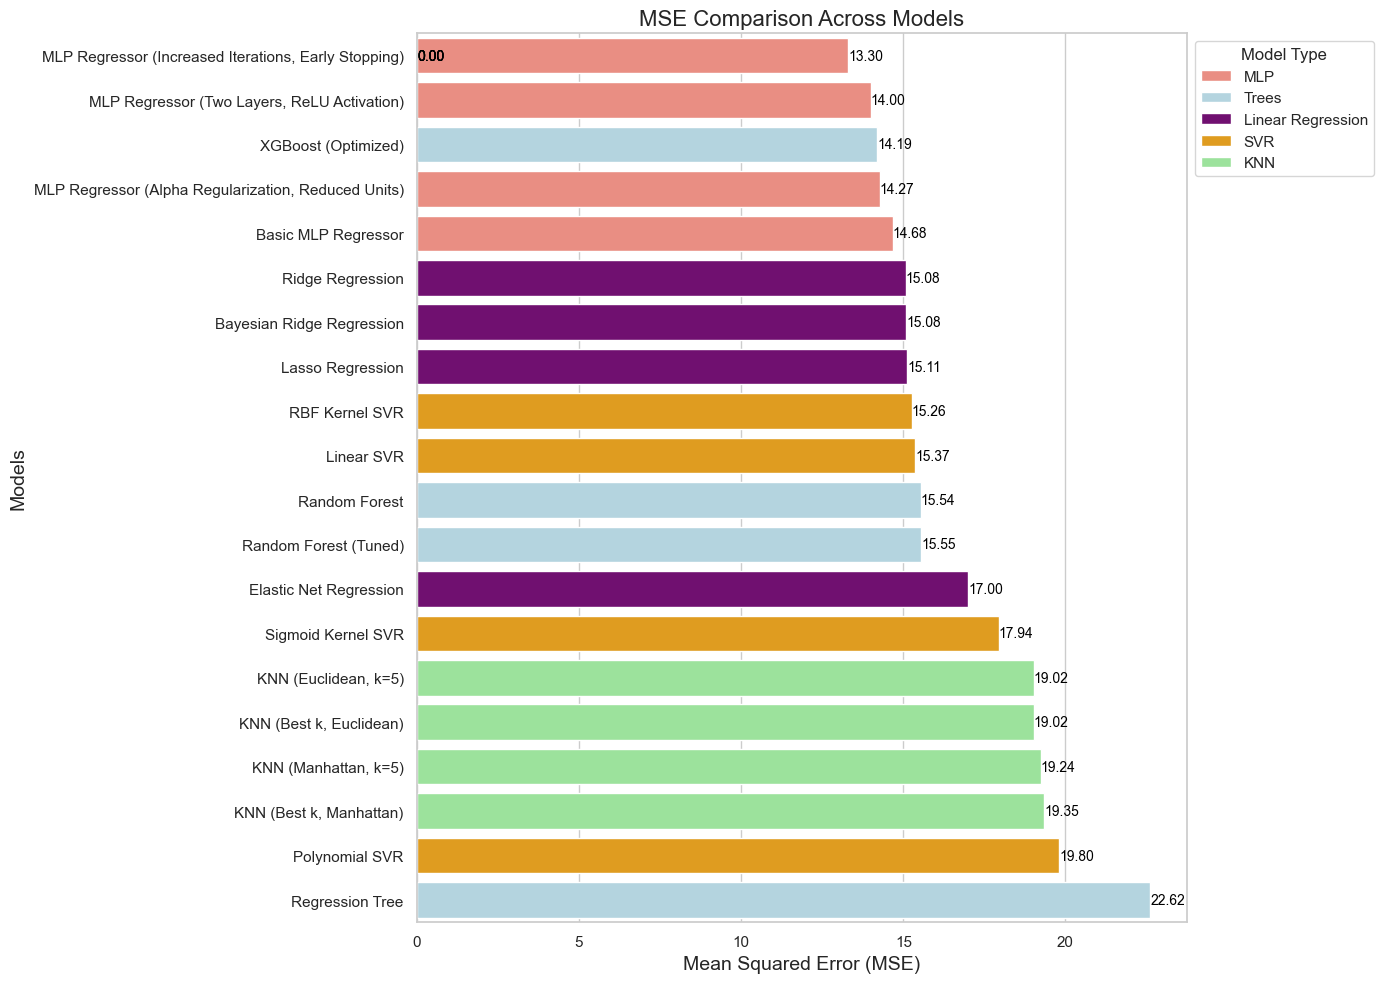

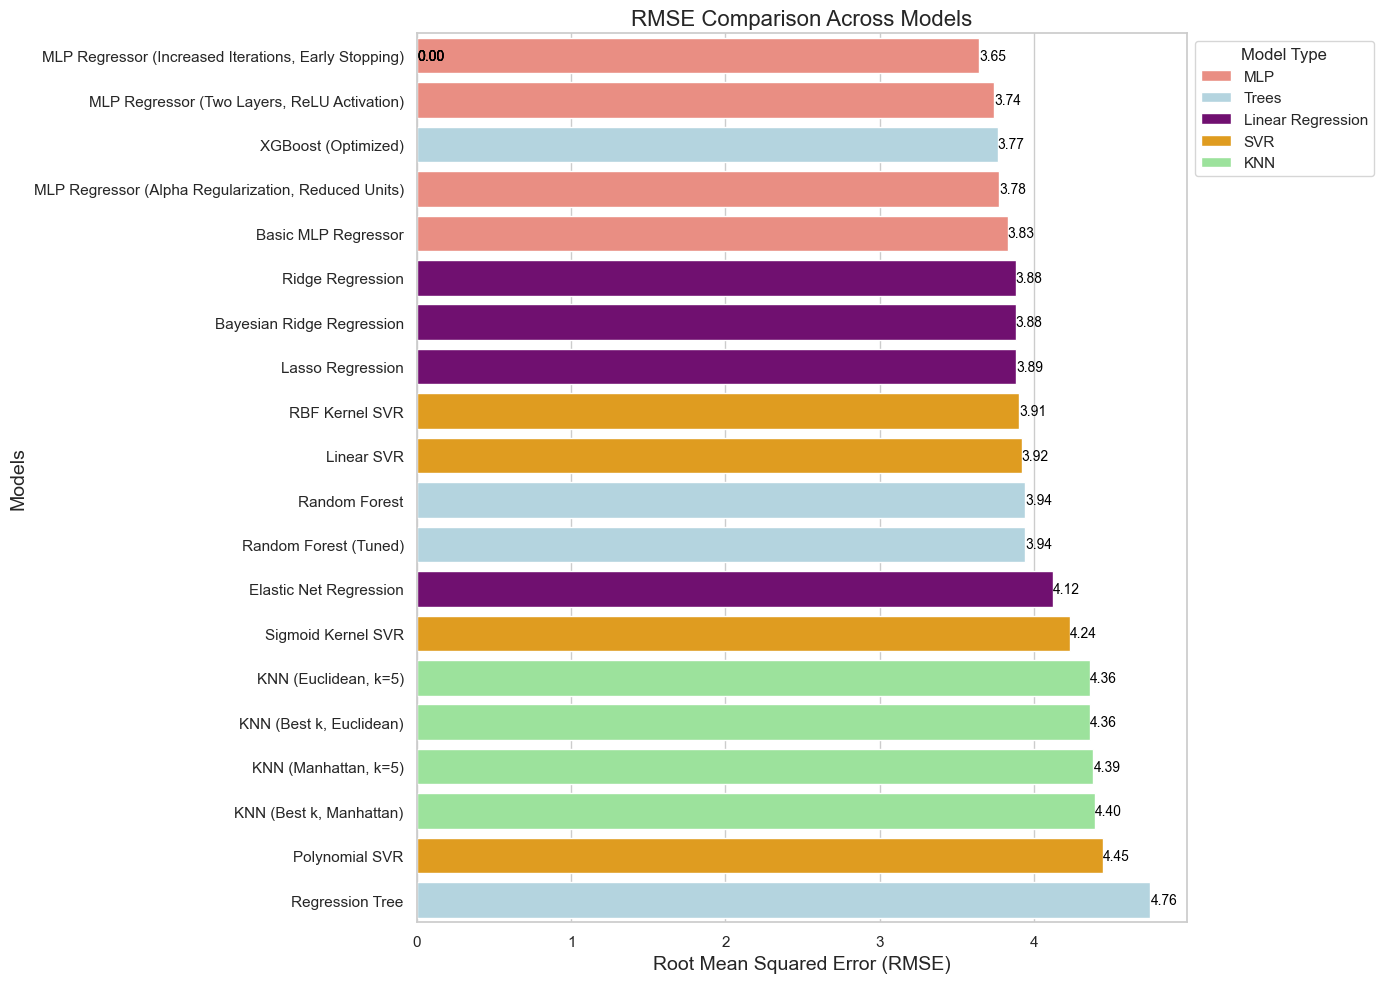

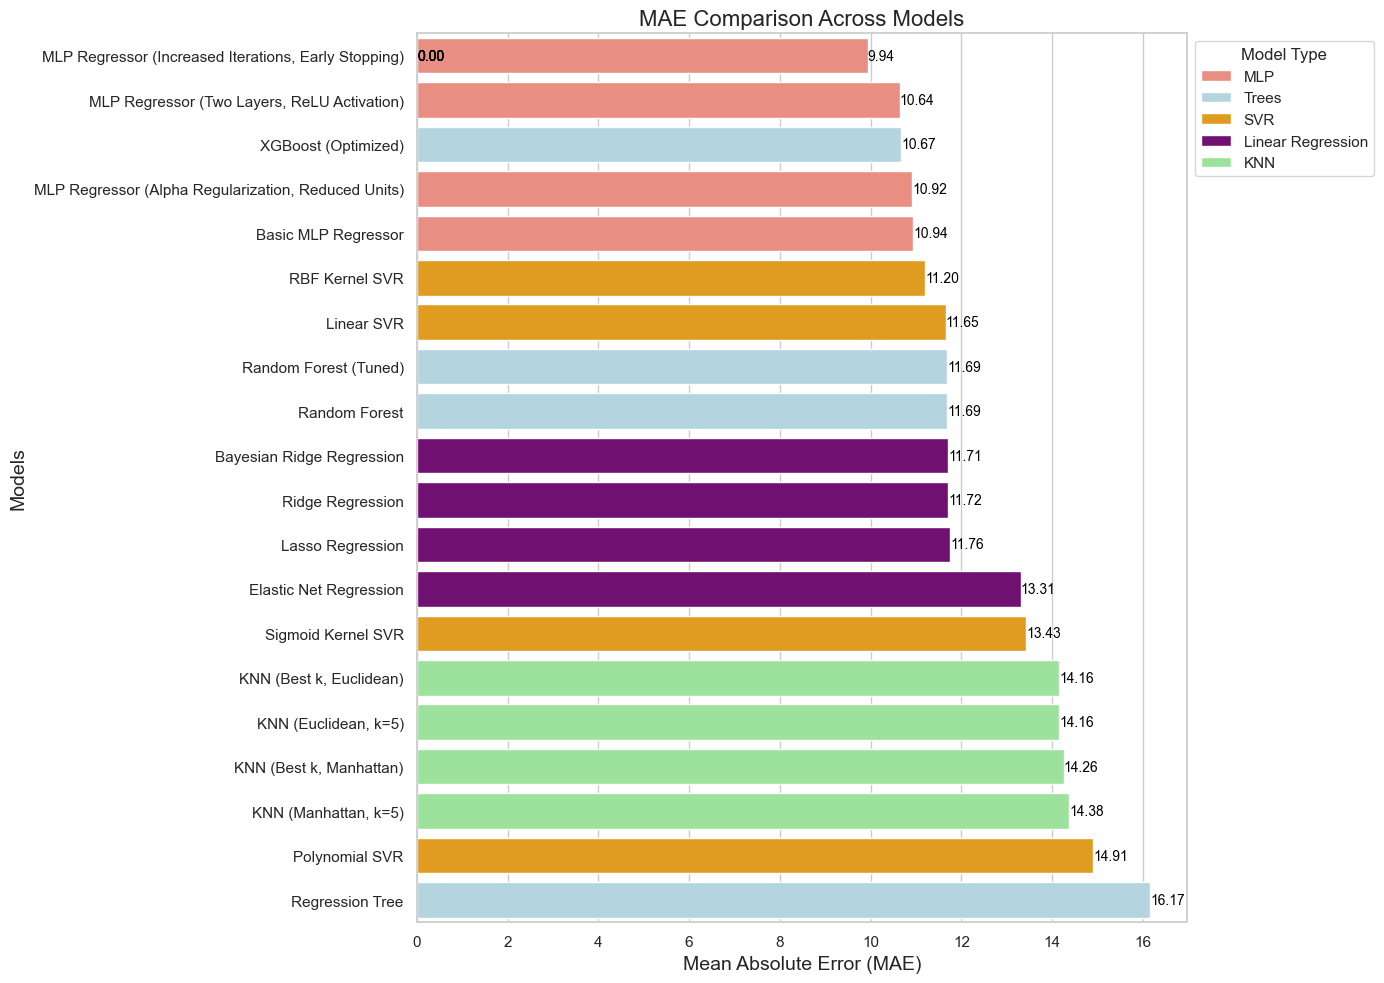

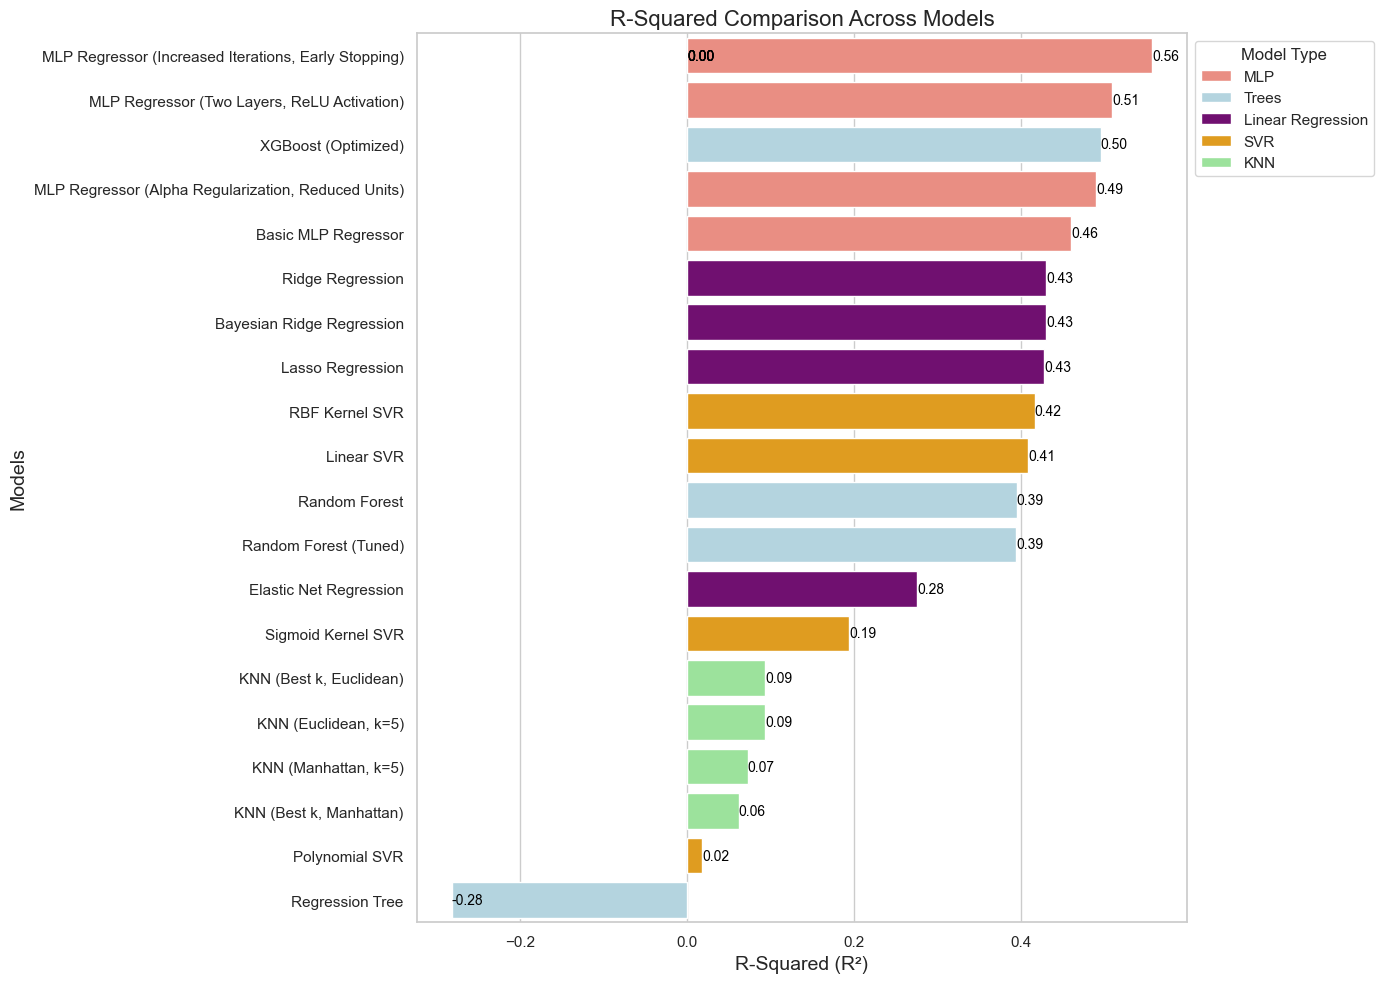

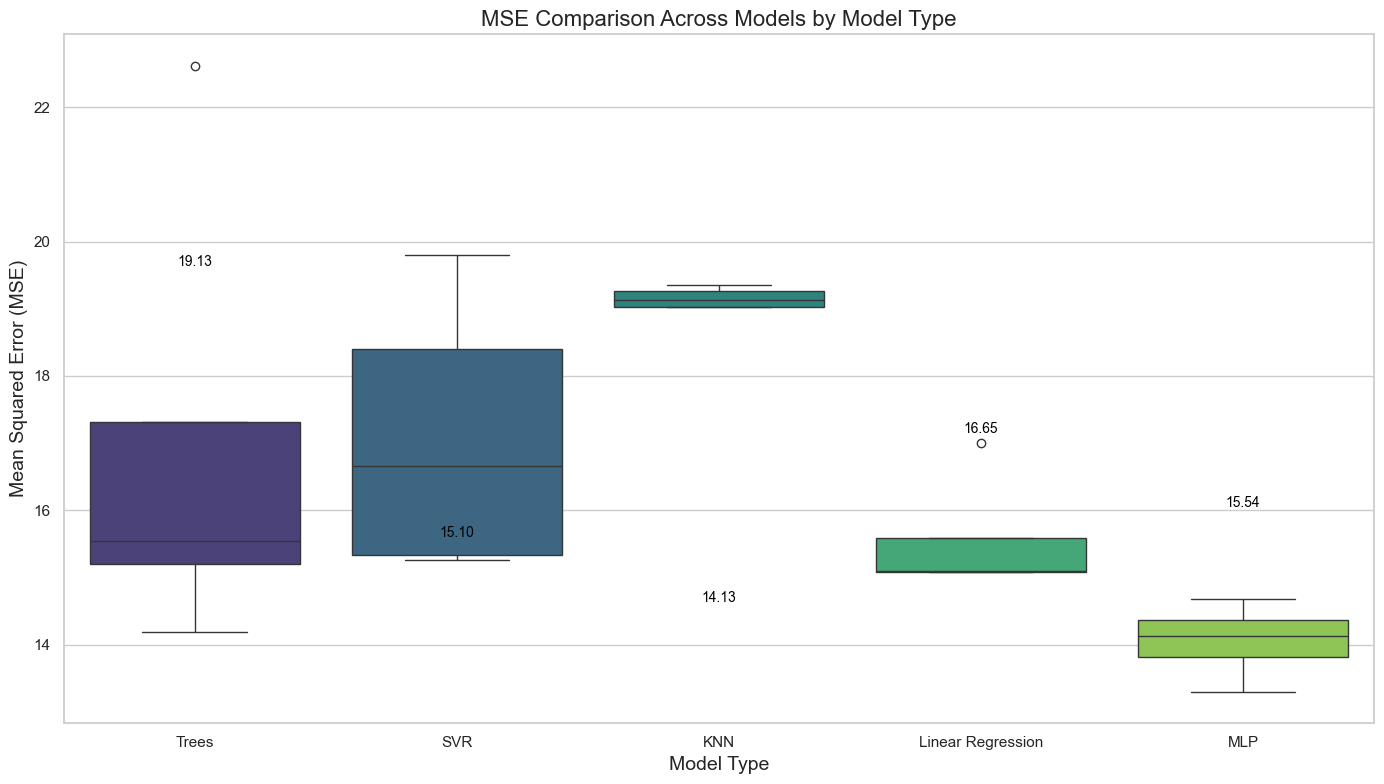

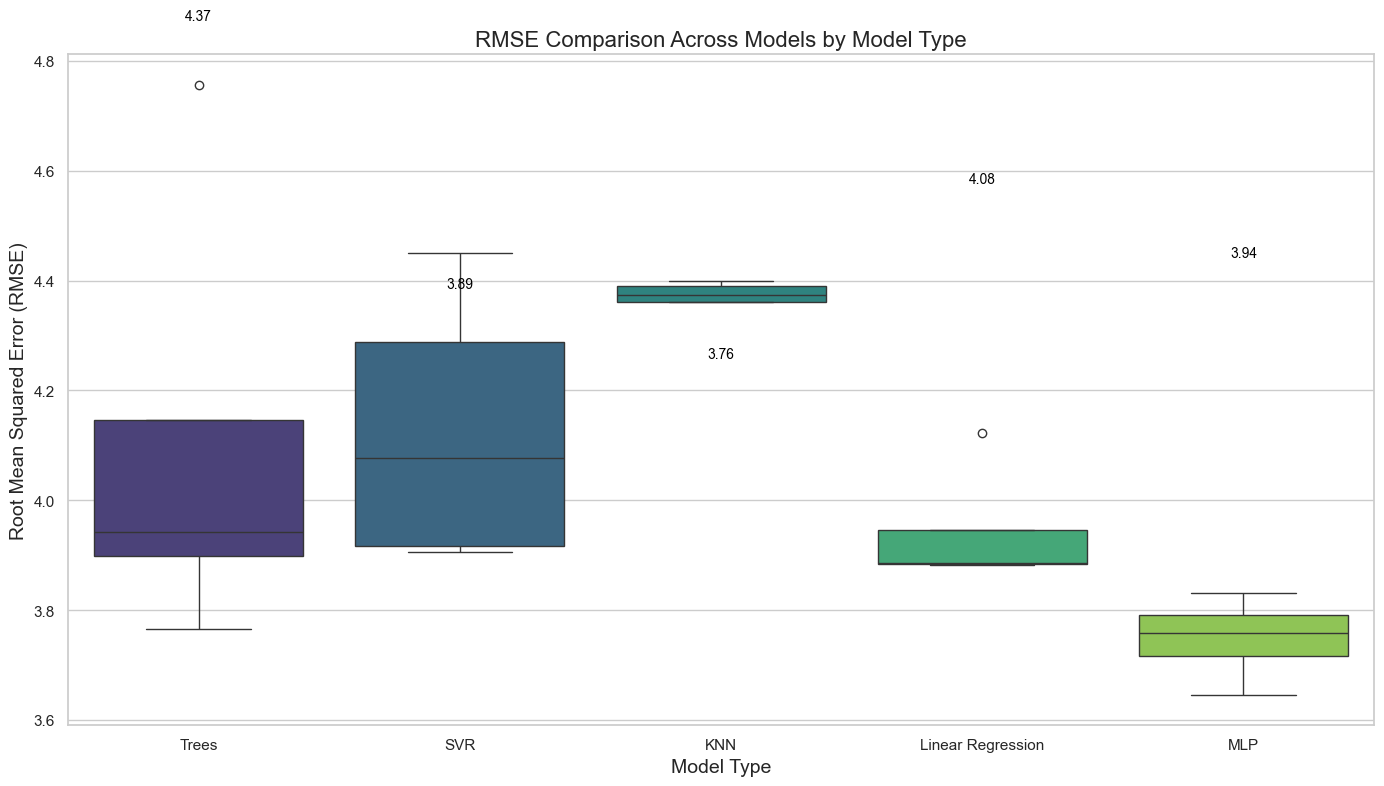

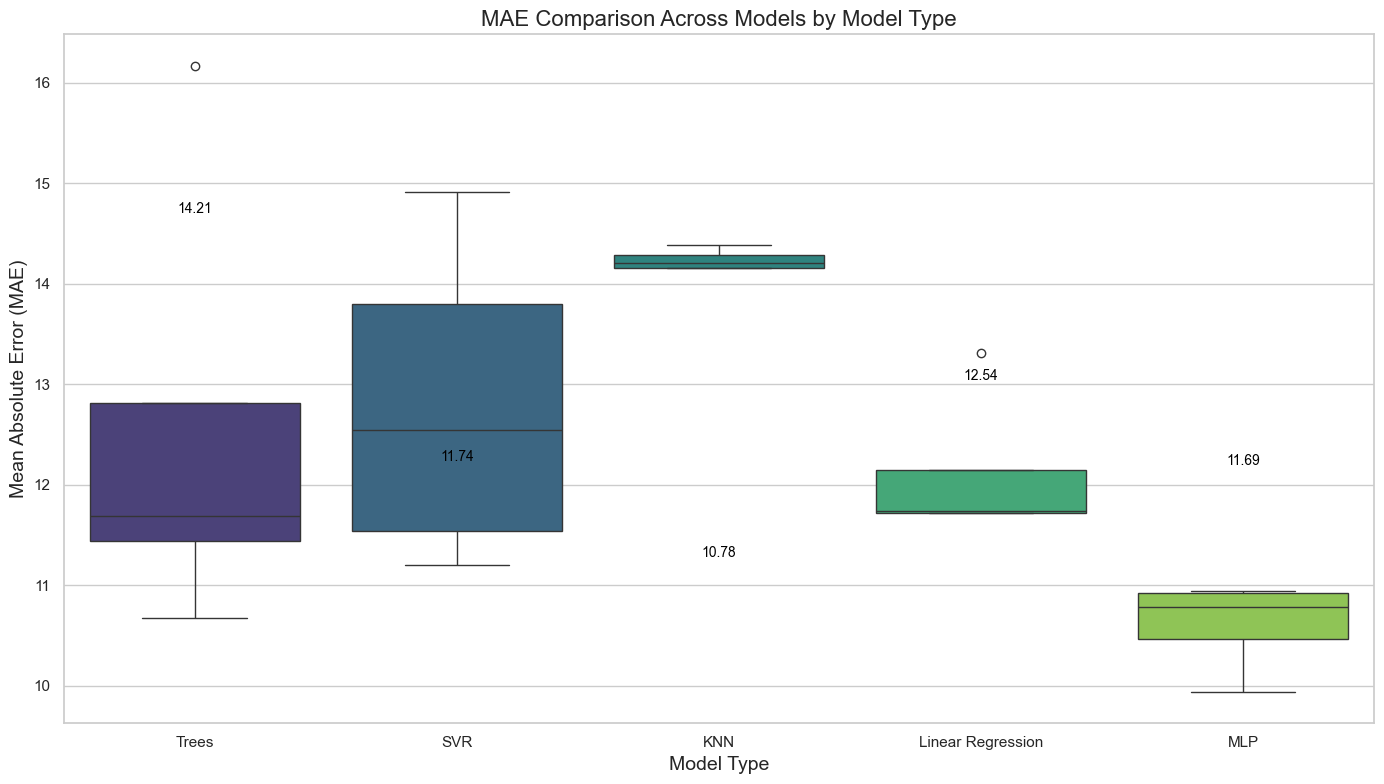

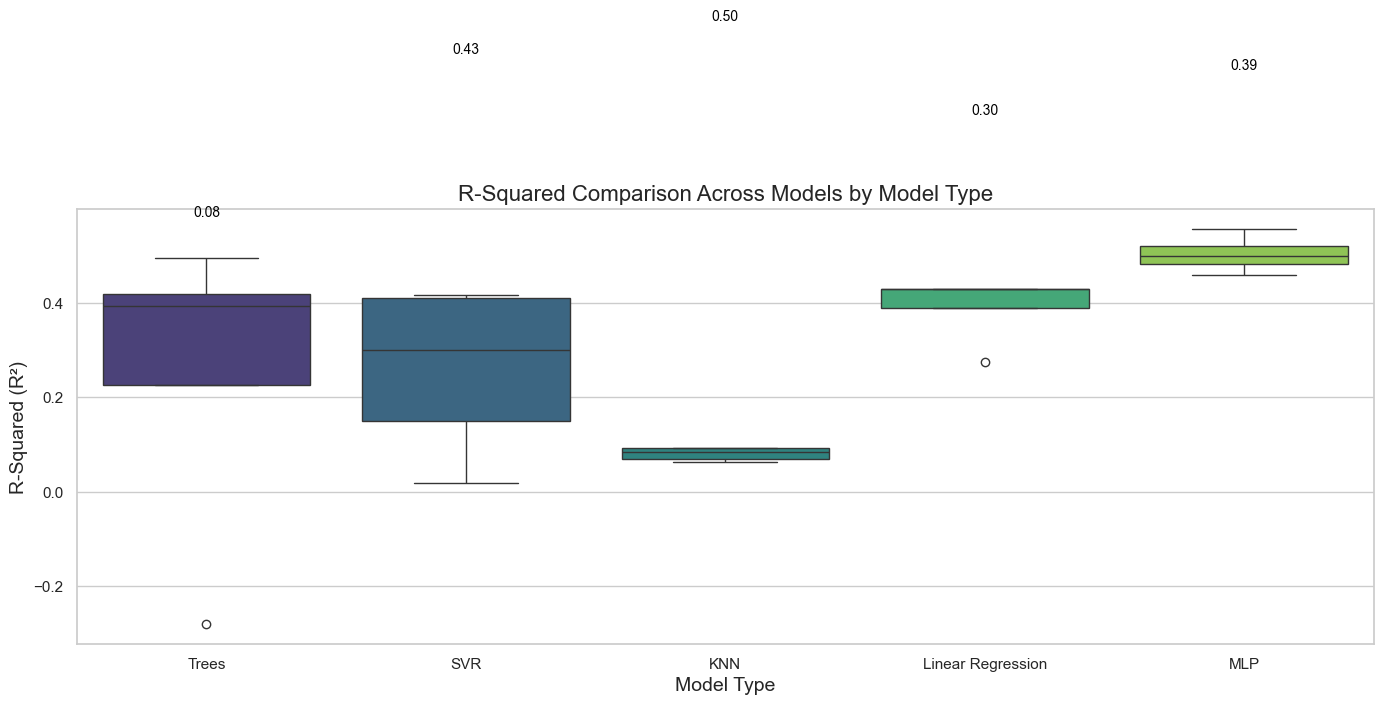

In [43]:
import pandas as pd

# Define the data
data = {
    "Model": [
        "Regression Tree", 
        "Random Forest", 
        "Random Forest (Tuned)", 
        "XGBoost (Optimized)", 
        "Linear SVR", 
        "Polynomial SVR", 
        "RBF Kernel SVR", 
        "Sigmoid Kernel SVR", 
        "KNN (Euclidean, k=5)", 
        "KNN (Manhattan, k=5)", 
        "KNN (Best k, Euclidean)", 
        "KNN (Best k, Manhattan)",
        "Ridge Regression", 
        "Lasso Regression", 
        "Bayesian Ridge Regression",
        "Elastic Net Regression",
        "Basic MLP Regressor",
        "MLP Regressor (Increased Iterations, Early Stopping)",
        "MLP Regressor (Two Layers, ReLU Activation)",
        "MLP Regressor (Alpha Regularization, Reduced Units)"
    ],
    "Mean Squared Error (MSE)": [
        22.619670996025913, 
        15.539927702360828, 
        15.545201715166833, 
        14.1868201653158, 
        15.36732624638202, 
        19.800030474188997, 
        15.259989447150897, 
        17.937937256117195,
        19.022110145019468, 
        19.239703407796995, 
        19.022110145019468, 
        19.35009992085309,
        15.079535883093923, 
        15.113374270046393, 
        15.081090324468002,
        16.999583781799753,
        14.676356768052003,
        13.295267801749288,
        13.996832505316197,
        14.268229428021714
    ],
    "Root Mean Squared Error (RMSE)": [
        4.75601419215985, 
        3.942071498889997, 
        3.942740381405658, 
        3.766539547823147, 
        3.920118141890882, 
        4.449722516538419, 
        3.9064036462135983, 
        4.235320207034787,
        4.361434413701468, 
        4.3863086311609445, 
        4.361434413701468, 
        4.398874847145925,
        3.8832378092377917, 
        3.887592348748309, 
        3.8834379516696287,
        4.123055151438039,
        3.8309733447326417,
        3.646267653608178,
        3.741234088548349,
        3.7773309926483427
    ],
    "Mean Absolute Error (MAE)": [
        16.168022478975086, 
        11.691575379047322, 
        11.690974359304217, 
        10.672547916504248, 
        11.6531636016291, 
        14.908938767518189, 
        11.2011288491952, 
        13.430894671128744,
        14.15583588776232, 
        14.382645602452252, 
        14.15583588776232, 
        14.255993083392282,
        11.715176021944107, 
        11.758841212527932, 
        11.713690036861868,
        13.307500560781797,
        10.94247456600741,
        9.938450828830108,
        10.641537061509942,
        10.9187557993905
    ],
    "R-Squared (R²)": [
        -0.28209903306678985, 
        0.39487235635459617, 
        0.39446154459694716, 
        0.49566495418548584, 
        0.4082399698612047, 
        0.01761726250818585, 
        0.41647768141012054, 
        0.19370492654454907,
        0.09329420969948699, 
        0.07243201469570926, 
        0.09329420969948699, 
        0.061756792423010576,
        0.4301967065180723, 
        0.42763656700762065, 
        0.43007922658063824,
        0.27585492471983175,
        0.46025885500260133,
        0.5570617512727647,
        0.5090824747550293,
        0.4898602405043422
    ]
}

model_types = {
    "Regression Tree": "Trees", 
    "Random Forest": "Trees", 
    "Random Forest (Tuned)": "Trees", 
    "XGBoost (Optimized)": "Trees", 
    "Linear SVR": "SVR", 
    "Polynomial SVR": "SVR", 
    "RBF Kernel SVR": "SVR", 
    "Sigmoid Kernel SVR": "SVR", 
    "KNN (Euclidean, k=5)": "KNN", 
    "KNN (Manhattan, k=5)": "KNN", 
    "KNN (Best k, Euclidean)": "KNN", 
    "KNN (Best k, Manhattan)": "KNN",
    "Ridge Regression": "Linear Regression", 
    "Lasso Regression": "Linear Regression", 
    "Bayesian Ridge Regression": "Linear Regression",
    "Elastic Net Regression": "Linear Regression",
    "Basic MLP Regressor": "MLP", 
    "MLP Regressor (Increased Iterations, Early Stopping)": "MLP",
    "MLP Regressor (Two Layers, ReLU Activation)": "MLP",
    "MLP Regressor (Alpha Regularization, Reduced Units)": "MLP"
}

results_df = pd.DataFrame(data)
results_df["Model Type"] = results_df["Model"].map(model_types)

metrics = ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)", "R-Squared (R²)"]
titles = ["MSE Comparison Across Models", "RMSE Comparison Across Models", "MAE Comparison Across Models", "R-Squared Comparison Across Models"]

palette = {
    "Trees": "lightblue", 
    "SVR": "orange", 
    "KNN": "lightgreen", 
    "Linear Regression": "purple", 
    "MLP": "salmon"
}

for metric, title in zip(metrics, titles):
    df_results_sorted = results_df.sort_values(by=metric, ascending=(metric != "R-Squared (R²)"))
    
    plt.figure(figsize=(14, 10))
    bar_plot = sns.barplot(x=metric, y="Model", data=df_results_sorted, hue="Model Type", dodge=False, palette=palette)
    
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_width(), '.2f'), 
                          (p.get_width(), p.get_y() + p.get_height() / 2), 
                          ha='left', va='center', fontsize=10, color='black')
    
    plt.title(title, fontsize=16)
    plt.xlabel(metric, fontsize=14)
    plt.ylabel("Models", fontsize=14)
    plt.legend(title="Model Type", bbox_to_anchor=(1, 1), loc="upper left")  
    plt.tight_layout()
    plt.show()

for metric, title in zip(metrics, titles):
    plt.figure(figsize=(14, 8))
    
    sns.boxplot(x="Model Type", y=metric, data=results_df, hue="Model Type", palette="viridis", legend=False)
    
    median_values = results_df.groupby("Model Type")[metric].median()
    for index, median in enumerate(median_values):
        plt.text(index, median + 0.5, f"{median:.2f}", ha='center', color="black", fontsize=10)

    plt.title(f"{title} by Model Type", fontsize=16)
    plt.xlabel("Model Type", fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.tight_layout()
    plt.show()


## Model Performance Analysis

Let’s break down how each model type performed and the impact of various optimizations:

#### 1. **Tree-Based Models (Regression Tree, Random Forest, XGBoost)**

- **Regression Tree**: This model didn't perform well overall, showing high MSE and RMSE values. It often overfits to the training data, making it less reliable for generalizing age predictions.
  
- **Random Forest (Optimized and Tuned)**: This model showed improved performance compared to the Regression Tree. By averaging multiple trees, it reduced overfitting and captured broader patterns. The tuning helped lower error metrics, indicating that adding more trees and controlling depth led to better age predictions.

- **XGBoost (Optimized)**: Among the tree-based models, XGBoost performed the best, achieving relatively low MSE and RMSE. Its gradient-boosting approach corrects previous errors, making it effective for this dataset. The optimizations, like adjusting learning rates and max depth, helped strike a balance between accuracy and efficiency.

#### 2. **Support Vector Regression (SVR with Various Kernels)**

- **Linear SVR**: This model performed reasonably well, capturing some linear patterns but struggled with non-linear relationships common in age prediction.
  
- **Polynomial and RBF SVR**: The RBF kernel showed better results, with lower MSE and RMSE. It maps data into higher dimensions, helping capture complex patterns in facial images.
  
- **Sigmoid Kernel SVR**: This model performed the worst among the SVR options, with high MSE and MAE. The sigmoid kernel isn’t typically used for regression tasks and struggled with the non-linear nature of age prediction.

#### 3. **K-Nearest Neighbors (KNN)**

- **Euclidean and Manhattan Distances**: KNN's performance was inconsistent, yielding higher MSE and RMSE than other models. This is likely due to its sensitivity to high-dimensional data, even after applying PCA, and its dependence on the chosen distance metric, which may not fully capture age-related features.

- **Best K Selection**: Testing different values of \( k \) provided slight improvements, but KNN generally lagged behind other methods since it doesn’t capture relationships beyond immediate neighbors.

#### 4. **Regularized Linear Regressions (Ridge, Lasso, Bayesian Ridge, Elastic Net)**

- **Ridge and Lasso**: These models performed moderately well. Ridge’s L2 penalty helps prevent overfitting, while Lasso’s L1 penalty can effectively select features by shrinking some coefficients to zero.
  
- **Bayesian Ridge and Elastic Net**: Both showed slightly better performance with lower errors. Elastic Net's combination of ridge and lasso penalties improved stability in predictions.

#### 5. **Multi-Layer Perceptron (MLP) Models**

- **Basic MLP Regressor**: This model performed reasonably well even without significant tweaks, showing that neural networks can effectively capture complex patterns in image data.
  
- **Optimized MLP (Increased Iterations, Early Stopping, Two Layers, ReLU Activation)**: This version achieved the best performance overall, with the lowest MSE and RMSE. The addition of layers and ReLU activation allowed the model to learn deeper, more complex features. Early stopping helped prevent overfitting, enhancing robustness.

- **MLP with Regularization**: Using alpha regularization and fewer units resulted in slightly higher error metrics compared to the best MLP but still outperformed many non-neural models. Regularization likely helped keep the network balanced and prevent it from overfitting to specific training patterns.

## Observations and Implications

1. **Best Performing Model**: The optimized MLP with multiple layers and ReLU activation proved to be the most effective. This suggests that fine-tuned neural networks can handle age prediction well, especially when working with PCA-reduced image data.

2. **Impact of PCA and Scaling**: Using PCA for dimensionality reduction was essential for managing computational demands and affected how well each model performed. Linear models and MLPs benefited from PCA, which helped focus on the most relevant features.

3. **Suitability of Tree-Based and SVR Models**: XGBoost stood out as the best tree-based model, while RBF SVR performed reasonably well. However, tree-based models struggled with generalization, possibly due to PCA compressing too much information.

4. **Reasons for Underperformance**: Models like KNN and Sigmoid SVR consistently showed high errors. KNN's reliance on distance metrics in high dimensions made it less effective, while the sigmoid SVR had difficulty capturing meaningful relationships in this image-based task.

## Conclusion

In summary, the results indicate that the most effective model for predicting age from PCA-reduced, grayscale images is the optimized MLP regressor with early stopping and multiple layers. This highlights the importance of choosing models that can capture non-linear relationships and complex patterns, as well as the benefits of reducing computational load through PCA while retaining predictive power.


# Explainability

In this section, we’ll explore how to interpret our age prediction model by examining the impact of specific features on its predictions. Since the model was trained on PCA-transformed data, our first step is to understand the structure of the PCA components. This will help us identify which areas of the facial images contribute most to the principal components that the model uses.

Once we have a grasp of the PCA transformation, we'll dive into interpreting the model's predictions. We’ll utilize SHAP (SHapley Additive exPlanations) to calculate feature importance scores, which will show us which PCA-derived features have the most influence on age predictions. By reversing the PCA transformation, we can map these SHAP values back to the original pixel space, highlighting the facial regions that are crucial for accurate age estimation. This dual approach gives us a clearer picture of how the PCA transformation and the model work together to make predictions, improving interpretability in the model's decision-making process.

## Technique 1: PCA Component Visualization for Feature Interpretation

Explaining the Principal Component Analysis (PCA) process is crucial because it served as a foundational step in our modeling pipeline, significantly shaping the feature space for all subsequent models. By reducing the original 40,000-pixel space to the top 500 principal components, PCA allowed us to manage the high dimensionality of facial images on a standard computer, preserving the most important variance while removing redundant information. This dimensionality reduction was not just a preprocessing step but an implicit feature selection that set the assumptions for the models we applied later. Understanding how PCA selected these features provides insights into the patterns that drive age prediction and helps us interpret the downstream models that rely on this reduced representation. In essence, the interpretability of PCA components is necessary to ensure that the selected features truly encapsulate meaningful aspects of the data, thereby validating the foundations of our predictive models.

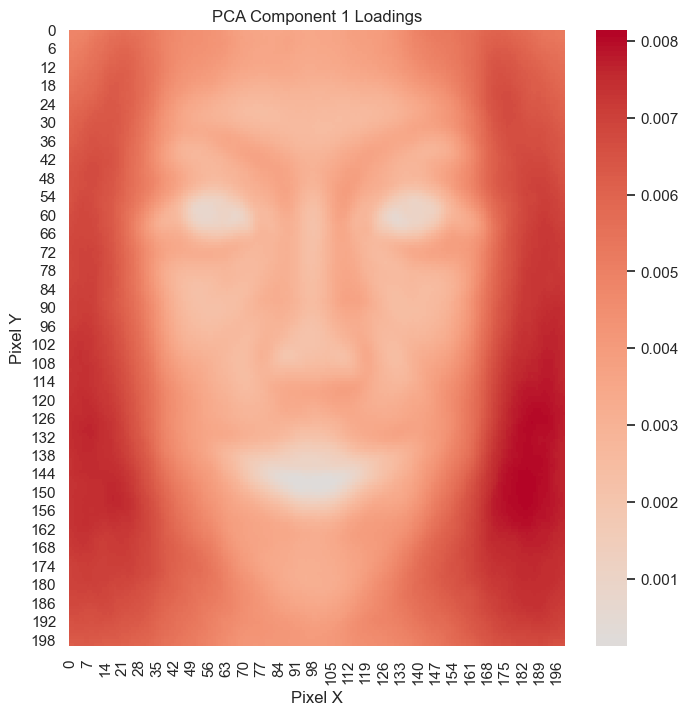


Top 10 contributing pixels for Component 1:
Top 1 pixel: (X=184, Y=152) with loading=0.0081
Top 2 pixel: (X=183, Y=150) with loading=0.0081
Top 3 pixel: (X=183, Y=147) with loading=0.0081
Top 4 pixel: (X=183, Y=148) with loading=0.0081
Top 5 pixel: (X=185, Y=148) with loading=0.0081
Top 6 pixel: (X=183, Y=149) with loading=0.0081
Top 7 pixel: (X=184, Y=146) with loading=0.0081
Top 8 pixel: (X=184, Y=147) with loading=0.0081
Top 9 pixel: (X=184, Y=149) with loading=0.0081
Top 10 pixel: (X=184, Y=148) with loading=0.0081


In [50]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pca_model_path = "./pca_model.joblib"
pca = joblib.load(pca_model_path)

component_number = 0 

component = pca.components_[component_number]

image_height, image_width = 200, 200

component_image = component.reshape(image_height, image_width)

plt.figure(figsize=(8, 8))
sns.heatmap(component_image, cmap="coolwarm", center=0)
plt.title(f"PCA Component {component_number + 1} Loadings")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.show()

n_top_pixels = 10 
top_pixel_indices = np.argsort(np.abs(component))[-n_top_pixels:]

print(f"\nTop {n_top_pixels} contributing pixels for Component {component_number + 1}:")
for i, idx in enumerate(top_pixel_indices, 1):
    y, x = np.divmod(idx, image_width) s
    print(f"Top {i} pixel: (X={x}, Y={y}) with loading={component[idx]:.4f}")



For the first principal component, the **most relevant pixels** are clustered primarily around the **cheek and lower face region**, with the top contributing pixels located at coordinates like (X=184, Y=152) and surrounding points. Each of these pixels carries a loading value of approximately 0.0081, indicating strong influence on the component’s variance. 

The heatmap further reveals that the **cheeks, forehead, nose, and eye boundaries** are the most influential areas for this component. This distribution suggests that the component captures broader structural facial features, likely relating to age-related skin texture or contours. Interestingly, the **eyes and mouth regions**, which typically hold critical age-indicating details, are represented with lower loadings and appear in lighter shades on the heatmap. This lower emphasis on eyes and mouth was unexpected, as these regions often contain vital details related to age; however, this suggests that the first principal component focuses more on general facial shape and texture rather than on fine-grained details.

## Technique 2: SHAP-Based Pixel Mapping for Model Interpretation

In this analysis, we focus on interpreting the predictions of our PCA-transformed MLP model by mapping SHAP values back to the original pixel space. Using SHAP, a technique that provides explanations for model predictions, we generate importance scores for each PCA component, which indicates their contribution to the model’s output. However, because the model was trained on a reduced feature set after PCA, these SHAP values initially apply to principal components rather than to raw pixel values. To make this interpretable in the context of the original images, we reverse-map the SHAP values using the PCA component loadings. This involves calculating the influence of each principal component on each pixel and aggregating these to form a comprehensive heatmap over the original image dimensions. The result is a visual representation that highlights specific regions of the face (e.g., eyes, mouth, cheeks) according to their importance in age prediction, effectively connecting the model’s behavior back to observable features in the original image space.

PermutationExplainer explainer: 101it [02:00,  1.31s/it]                         


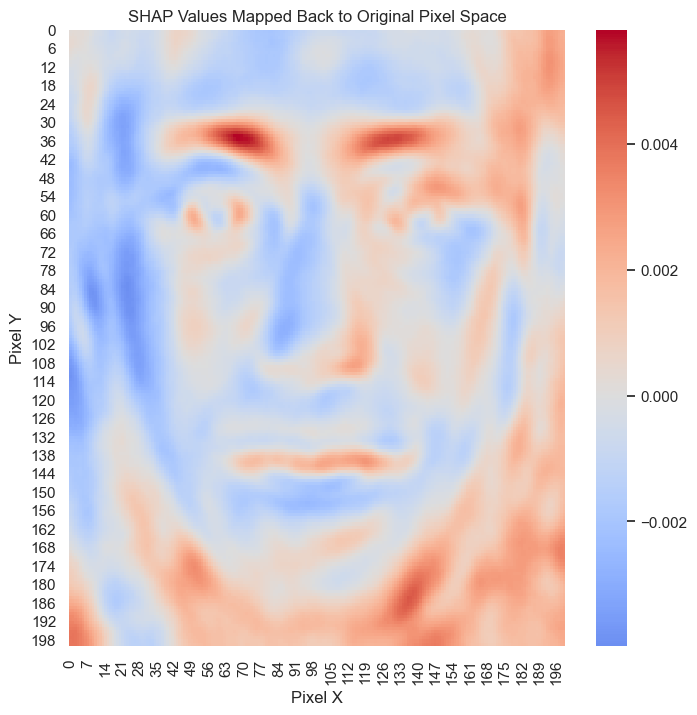

In [59]:
import joblib
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns

model_path = "./mlp_with_increased_iterations_and_early_stopping"  
pca_model_path = "./pca_model.joblib"  

model = joblib.load(model_path)  
pca = joblib.load(pca_model_path)  

def explain_model_shap(model, pca, X_test, image_shape=(200, 200), max_evals=1001, sample_size=100):

    X_test_sampled = shap.sample(X_test, sample_size)

    explainer = shap.Explainer(model.predict, X_test_sampled, max_evals=max_evals)
    shap_values_pca = explainer(X_test_sampled)
    
    original_shap_values = np.zeros(image_shape)

    for component_idx in range(500):
        shap_values_for_component = np.mean(shap_values_pca.values[:, component_idx], axis=0)
        
        component_loadings = pca.components_[component_idx].reshape(image_shape)
        
        original_shap_values += shap_values_for_component * component_loadings
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(original_shap_values, cmap="coolwarm", center=0)
    plt.title("SHAP Values Mapped Back to Original Pixel Space")
    plt.xlabel("Pixel X")
    plt.ylabel("Pixel Y")
    plt.show()

explain_model_shap(model, pca, X_test)

The SHAP values show that the right side of the face is especially important for predicting age, with the red areas indicating a positive impact on the model’s output. The eyebrows stand out more in this analysis compared to PCA, suggesting they’re significant for the predictions. This emphasizes that features like skin texture and the appearance of eyebrows really matter in estimating age, highlighting the model's focus on key facial traits rather than irrelevant details.

# Project Conclusion

In this project, we successfully developed an efficient age prediction model from facial images using traditional machine learning techniques, achieving our goal of balancing accuracy and computational feasibility on a standard personal computer. By applying dimensionality reduction through PCA, we managed to transform the data into a form that preserved key features while keeping the computational load manageable.

Through our explainability analysis, we were able to interpret the model's decisions effectively. We explored how PCA components and SHAP values contributed to understanding which facial features most influenced the predictions, highlighting the importance of areas like eyebrows, cheeks, and the right side of the face. This allowed us to ensure that the model was focusing on meaningful traits and enhanced our understanding of its behavior.

Overall, our approach demonstrates the potential of lightweight machine learning models for age prediction tasks, even when working with limited computational resources. The project emphasizes the value of dimensionality reduction, feature interpretation, and thoughtful preprocessing in building robust models that can generalize well across different demographic groups. This work lays the foundation for deploying accessible age prediction solutions in real-world applications, such as mobile and edge devices, where resources are often constrained.